In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
KPMG=pd.ExcelFile("D:\Internships\KPMG\KPMG_VI_New_raw_data_update_final2.xlsx")

In [3]:
Transactions=pd.read_excel(KPMG,'Transactions')
NewCustomerList=pd.read_excel(KPMG,'NewCustomerList')
CustomerDemographic=pd.read_excel(KPMG,'CustomerDemographic')
CustomerAddress=pd.read_excel(KPMG,'CustomerAddress')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11936\951194514.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList=pd.read_excel(KPMG,'NewCustomerList')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11936\951194514.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic=pd.read_excel(KPMG,'CustomerDemographic')


# TRANSACTIONS DATA

In [4]:
Transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [5]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
#To check null values
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [7]:
#To check unique values
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [8]:
#Duplicate values
Transactions.duplicated().sum()

0

Lets explore columns

In [9]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [10]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [11]:
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [12]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [13]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [14]:
#converting date column from integer to datetime
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')
Transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [15]:
Transactions['product_first_sold_date'].head(50)

0    1970-01-01 11:27:25
1    1970-01-01 11:35:01
2    1970-01-01 10:06:01
3    1970-01-01 10:02:25
4    1970-01-01 11:43:46
5    1970-01-01 10:50:31
6    1970-01-01 09:29:25
7    1970-01-01 11:05:15
8    1970-01-01 09:17:35
9    1970-01-01 10:36:56
10   1970-01-01 11:19:44
11   1970-01-01 11:42:52
12   1970-01-01 09:35:27
13   1970-01-01 09:36:26
14   1970-01-01 10:36:33
15   1970-01-01 10:31:13
16   1970-01-01 10:36:46
17   1970-01-01 09:24:48
18   1970-01-01 11:05:15
19   1970-01-01 10:22:17
20   1970-01-01 10:05:34
21   1970-01-01 10:06:01
22   1970-01-01 11:42:25
23   1970-01-01 11:46:44
24   1970-01-01 09:27:59
25   1970-01-01 11:42:25
26   1970-01-01 11:24:07
27   1970-01-01 11:49:20
28   1970-01-01 11:51:50
29   1970-01-01 11:38:42
30   1970-01-01 10:25:39
31   1970-01-01 11:51:28
32   1970-01-01 11:46:44
33   1970-01-01 10:49:51
34   1970-01-01 10:44:07
35   1970-01-01 10:31:14
36   1970-01-01 09:43:16
37   1970-01-01 09:19:09
38   1970-01-01 10:44:53
39   1970-01-01 10:44:07


We corrected the column product_first_sold_date as it was in integer format. Converted it to date format 

In [16]:
Transactions['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [17]:
print('standard_cost blanks:', pd.isna(Transactions['standard_cost']).sum())

standard_cost blanks: 197


In [18]:
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']
Transactions['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

<AxesSubplot:xlabel='online_order', ylabel='count'>

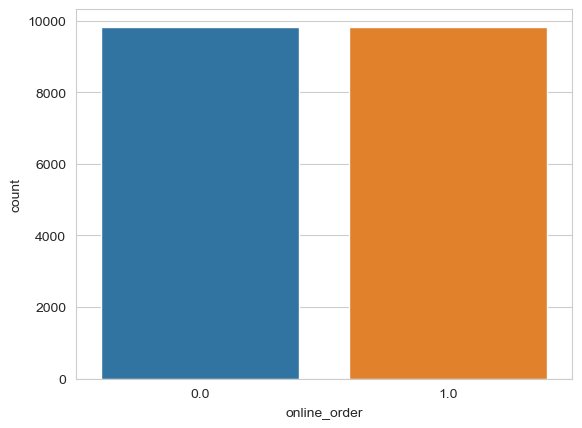

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='online_order',data=Transactions)

<AxesSubplot:xlabel='order_status', ylabel='count'>

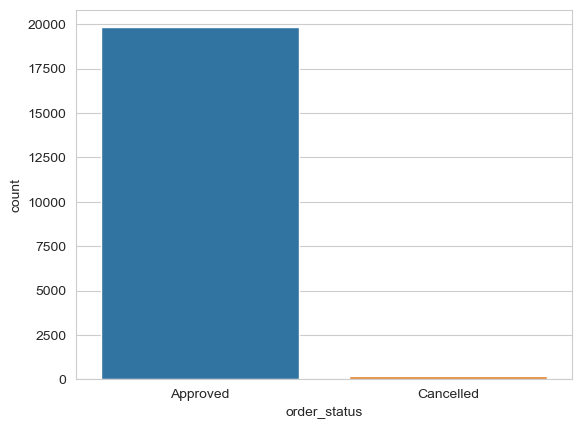

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='order_status',data=Transactions)

<AxesSubplot:xlabel='brand', ylabel='count'>

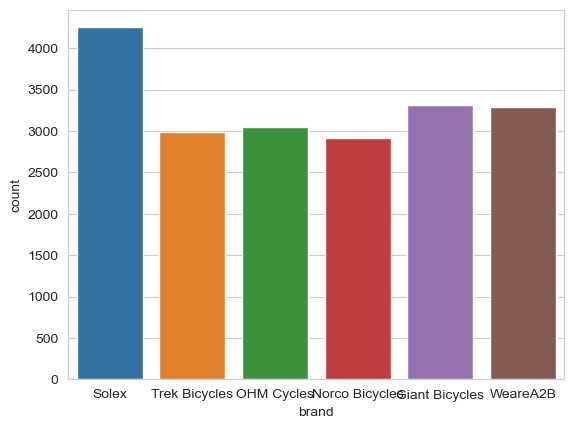

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='brand',data=Transactions)

<AxesSubplot:xlabel='product_class', ylabel='count'>

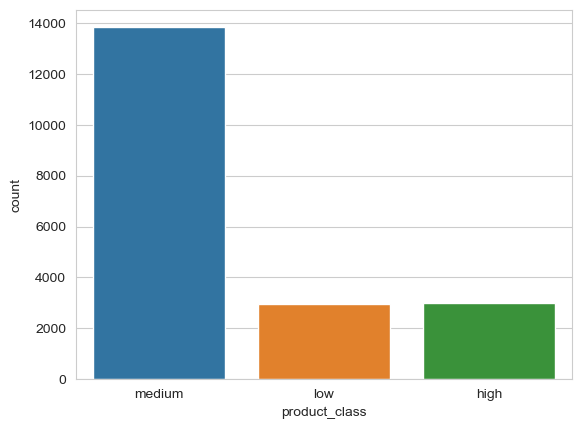

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='product_class',data=Transactions)

<AxesSubplot:xlabel='product_size', ylabel='count'>

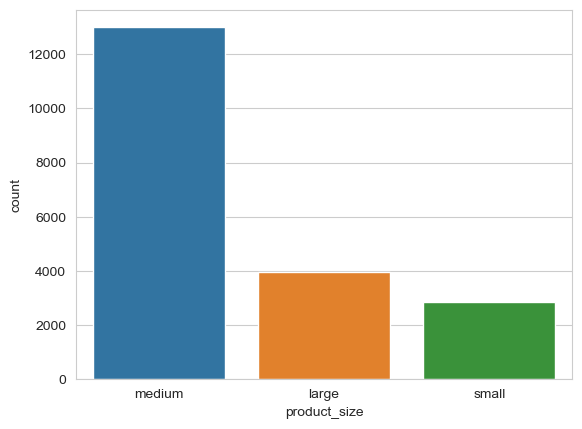

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='product_size',data=Transactions)

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='product_line',data=Transactions)

<AxesSubplot:xlabel='product_line', ylabel='count'>

# New Customer Lists

In [25]:
NewCustomerList.head(10)

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   
5      Druci    Brandli  Female                                   39   
6   Rutledge      Hallt    Male                                   23   
7     Nancie       Vian  Female                                   74   
8       Duff  Karlowicz    Male                                   50   
9    Barthel     Docket    Male                                   72   

         DOB                     job_title job_industry_category  \
0 1957-07-12               General Manager         Manufacturing   
1 1970-03-22           Structural Engineer              Property   
2 1974-08-28        Senior Cost Accountant    Financial Services   
3 1979-01-28    Account Representative III         Manufacturing   
4 1965-09-21             Financial Analyst    Financial Services   
5 1951-04-29       Assistant Media Planner         Entertainment   
6 1976-10-06          Compensation Analyst    Financial Services   
7 1972-12-27  Human Resources Assistant II                Retail   
8 1972-04-28            Speech Pathologist         Manufacturing   
9 1985-08-02       Accounting Assistant IV                    IT   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   
5     High Net Worth                  N      Yes  ...    QLD  Australia   
6      Mass Customer                  N       No  ...    NSW  Australia   
7      Mass Customer                  N      Yes  ...    QLD  Australia   
8      Mass Customer                  N      Yes  ...    NSW  Australia   
9      Mass Customer                  N      Yes  ...    QLD  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0                   6        0.58      0.7250      0.90625     0.770312   
1                  11        0.56      0.5600      0.70000     0.595000   
2                   5        0.77      0.7700      0.77000     0.770000   
3                   1        0.44      0.5500      0.55000     0.550000   
4                   9        1.07      1.0700      1.33750     1.337500   
5                   7        0.56      0.7000      0.70000     0.700000   
6                   7        0.75      0.7500      0.75000     0.637500   
7                   5        0.81      1.0125      1.01250     0.860625   
8                  10        1.00      1.2500      1.56250     1.328125   
9                   5        0.88      1.1000      1.10000     0.935000   

   Unnamed: 20  Rank     Value  
0            1     1  1.718750  
1            1     1  1.718750  
2            1     1  1.718750  
3            4     4  1.703125  
4            4     4  1.703125  
5            6     6  1.671875  
6            6     6  1.671875  
7            8     8  1.656250  
8            8     8  1.656250  
9           10    10  1.640625  

[10 rows x 23 columns]

In [26]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [27]:
#Dropping the unnamed columns
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [28]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [29]:
#Null values
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [30]:
#Duplicated values
NewCustomerList.duplicated().sum()

0

In [31]:
#Unique values of each column
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

Lets understand the columns

In [32]:
NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

17 entries with unknown gender

In [33]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [34]:
NewCustomerList['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [35]:
NewCustomerList['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [36]:
NewCustomerList['owns_car'].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [37]:
NewCustomerList['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

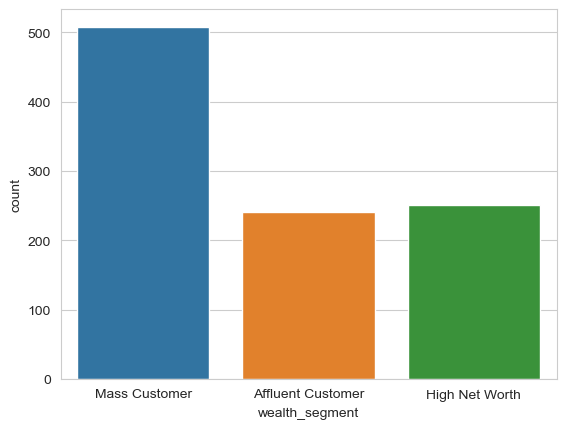

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='wealth_segment',data=NewCustomerList)

<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

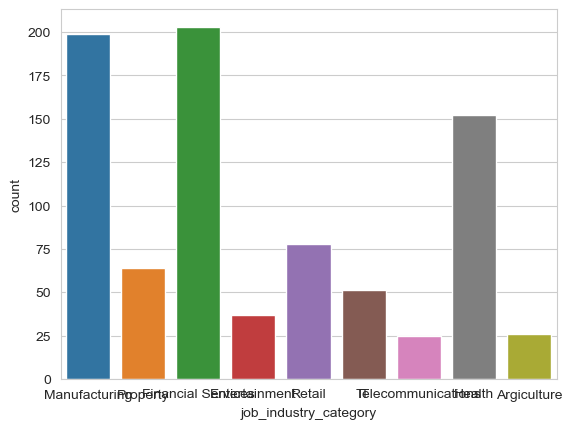

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='job_industry_category',data=NewCustomerList)

<AxesSubplot:xlabel='state', ylabel='count'>

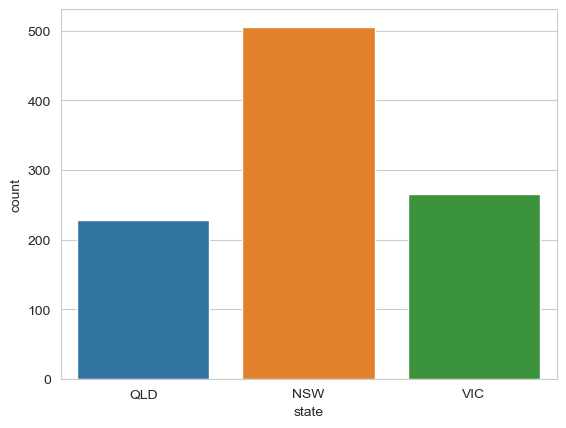

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='state',data=NewCustomerList)

# Customer Demographic

In [41]:
CustomerDemographic.head(10)

last_name  gender  past_3_years_bike_related_purchases        DOB  \
0  Medendorp       F                                   93 1953-10-12   
1    Bockman    Male                                   81 1980-12-16   
2     Dearle    Male                                   61 1954-01-20   
3        NaN    Male                                   33 1961-10-03   
4     Calton  Female                                   56 1977-05-13   
5  Duckhouse    Male                                   35 1966-09-16   
6     Merali  Female                                    6 1976-02-23   
7      Inder    Male                                   31 1962-03-30   
8       Lind  Female                                   97 1973-03-10   
9    Birdall  Female                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
3                                   NaN                    IT   
4                         Senior Editor                   NaN   
5                                   NaN                Retail   
6                                   NaN    Financial Services   
7                       Media Manager I                   NaN   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

      wealth_segment deceased_indicator  \
0      Mass Customer                  N   
1      Mass Customer                  N   
2      Mass Customer                  N   
3      Mass Customer                  N   
4  Affluent Customer                  N   
5     High Net Worth                  N   
6  Affluent Customer                  N   
7      Mass Customer                  N   
8  Affluent Customer                  N   
9      Mass Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0  
5                                           ðµ ð ð ð      Yes    13.0  
6                                          â°â´âµâââ      Yes    11.0  
7                            (â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)       No     7.0  
8                                                0/0      Yes     8.0  
9                                               ð©ð½      Yes    20.0

In [42]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   last_name                            3875 non-null   object        
 1   gender                               4000 non-null   object        
 2   past_3_years_bike_related_purchases  4000 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3494 non-null   object        
 5   job_industry_category                3344 non-null   object        
 6   wealth_segment                       4000 non-null   object        
 7   deceased_indicator                   4000 non-null   object        
 8   default                              3698 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

In [43]:
#Null values
CustomerDemographic.isnull().sum()

last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [44]:
#Unique values
CustomerDemographic.nunique()

last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

Lets understand the columns

In [45]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

Gender categories are not named properly hence convert it to proper format

In [46]:
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unknown')

In [47]:
CustomerDemographic['gender'].value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [48]:
CustomerDemographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [49]:
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [50]:
CustomerDemographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [51]:
CustomerDemographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [52]:
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

We will drop default values as it is inconsistent and not useful in analysis

In [53]:
CustomerDemographic['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [54]:
CustomerDemographic['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

<AxesSubplot:xlabel='owns_car', ylabel='count'>

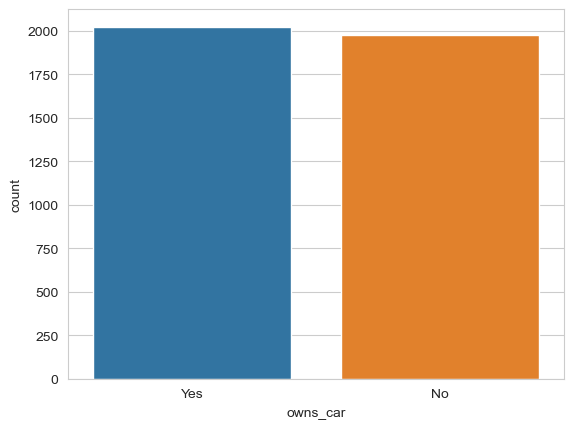

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='owns_car',data=CustomerDemographic)

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='wealth_segment',data=CustomerDemographic)

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='job_industry_category',data=CustomerDemographic)

<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

# Customer Address

In [58]:
CustomerAddress.head(10)

customer_id                  address  postcode            state    country  \
0            1       060 Morning Avenue      2016  New South Wales  Australia   
1            2      6 Meadow Vale Court      2153  New South Wales  Australia   
2            4       0 Holy Cross Court      4211              QLD  Australia   
3            5      17979 Del Mar Point      2448  New South Wales  Australia   
4            6         9 Oakridge Court      3216              VIC  Australia   
5            7         4 Delaware Trail      2210  New South Wales  Australia   
6            8      49 Londonderry Lane      2650  New South Wales  Australia   
7            9          97736 7th Trail      2023  New South Wales  Australia   
8           11     93405 Ludington Park      3044              VIC  Australia   
9           12  44339 Golden Leaf Alley      4557              QLD  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9  
5                   9  
6                   4  
7                  12  
8                   8  
9                   4

In [59]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [60]:
#Null values
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [61]:
#Unique values
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

Lets understand columns

In [62]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [63]:
CustomerAddress['state'] = CustomerAddress['state'].replace('NSW','New South Wales').replace('VIC','Victoria')

In [64]:
CustomerAddress['state'].value_counts()

New South Wales    2140
Victoria           1021
QLD                 838
Name: state, dtype: int64

In [65]:
CustomerAddress['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [66]:
CustomerAddress['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

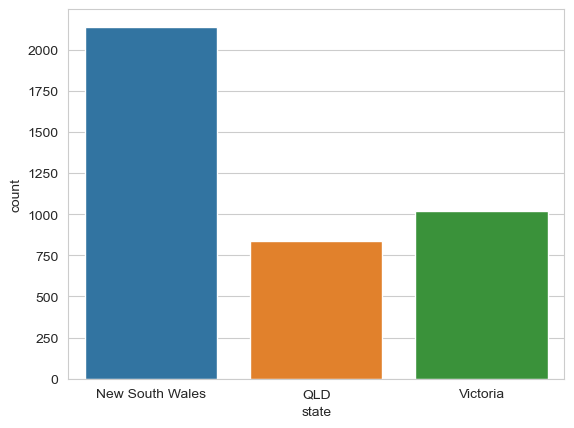

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='state',data=CustomerAddress)